In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline

# PCA

- Eine Datenbank 
    - Mehrere Variablen 
        - Gewichte, Schlafdauer, ...
        - Farbwert von vielen Pixeln in Bildern
    - Mehrere Einträge 
        - viele Tiere
        - viele Bilder
- In den Variablen 
    - ein paar davon wichtig/interessant: 
        - mit Varianz
        - mit Kovarianz
    - Mischungen *Hauptkomponenten* 
        - Eigenvektoren der Kovarianzmatrix
        - Bsp: Generelles Gewicht
        - Bsp: dunkler Mundbereich
- Hauptkomponenten
    - Unterraum im Datenraum
    - **Basis** für Darstellung der Daten
    - Dimensionsreduktion

#### Klassifizierung
- Anteile an Hauptkomponenten
    - Cluster

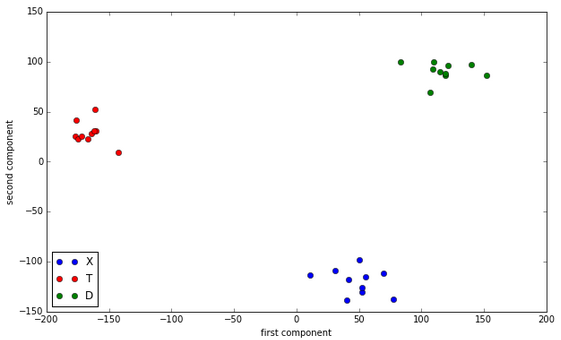

# Menschen und Computer
### Gesichter auseinanderhalten
- unterschiedliche Blickwinkel 不同视角
- unterschiedliche Beleuchtungssituationen 不同曝光情况
- unterschiedliche Gesichtsausdrücke 不同表情
- Komponentenzerlegung 组件拆分
- Speichern und vergleichen 存储与比较
- Lernfähig, erweiterbar 自适应，扩展

### Stimmungen ablesen
- Lachen, Trauer, Wut, ... 
- unabhängig von der Person
- andere Komponente im Gesichter-Raum

# Geräusche

## Cocktailparty Problem

Menschen können einzelnen Stimmen auseinanderhalten.

Weil sie sie klassifizieren können.

## Andere Lösung
Mathematik LGS : so viele Variablen bestimmar, wie (unabhängige) Gleichungen.

Ein Mikrophon im Raum reicht also nicht

Aber zwei für 2 Geräusche usw...

# Mehrere Quellsignale und Mischungen daraus

### Können wir die trennen?

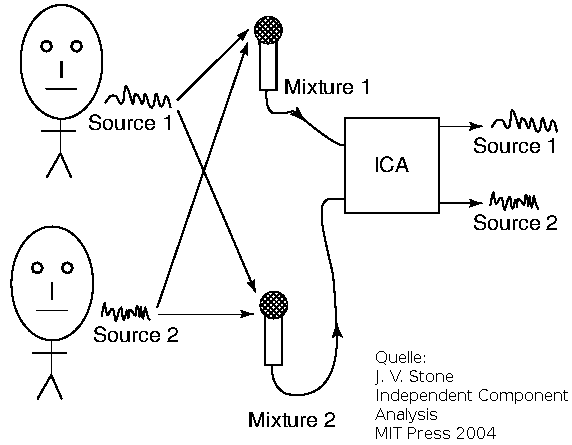

### Suche *unabhängige* Komponenten
#### independent components analysis

In [3]:
from scipy.io import wavfile
# datei einladen
freq, s1 = wavfile.read("data/wav_independent.wav")
freq, s2 = wavfile.read("data/wav_component.wav")
l = min(s1.shape[0], s2.shape[0]) # cut for same length
s1=s1[:l]
s2=s2[:l]

In [4]:
from IPython.lib.display import Audio
Audio(s1, rate=freq, autoplay=False)

In [5]:
Audio(s2, rate=freq, autoplay=False)

## Mischung


In [6]:
# mix s1 with .4 and s2 with .9
A11=0.4
A12=0.9
x1 = A11*s1 + A12*s2
# mix s1 with .7 and s2 with .5
A21=0.7
A22=0.5
x2 = A21*s1 + A22*s2

In [7]:
# nur anpassung fuer Lautstark, Numlisierung
Audio(0.4*x1, rate=freq, autoplay=False)

In [8]:
# nur anpassung fuer Lautstark, Numlisierung
Audio(0.4*x2, rate=freq, autoplay=False)

# Graphische Darstellung

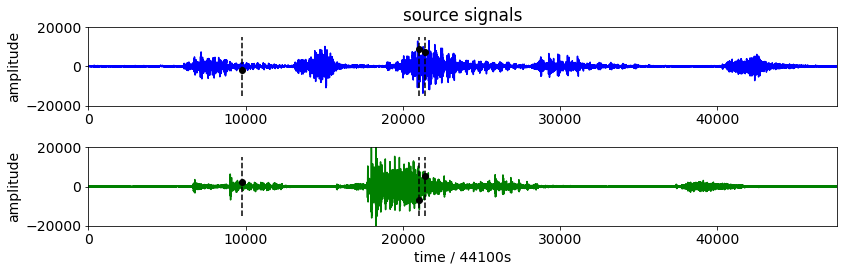

In [9]:
'''sources in time'''
fig = plt.figure(figsize=(12, 4))
fig.add_subplot(2, 1, 1)
plt.title('source signals')
plt.plot(s1, 'b-')
indices = [9778, 21040, 21385]
for i in indices:
    plt.plot(2*[i], [-15000, 15000], 'k--')
    plt.plot([i], [s1[i]], 'ko')
plt.axis((0, s1.shape[0], -20000, 20000))
plt.ylabel('amplitude')
fig.add_subplot(2, 1, 2)
plt.plot(s2, 'g-')
for i in indices:
    plt.plot(2*[i], [-15000, 15000], 'k--')
    plt.plot([i], [s2[i]], 'ko')
plt.axis((0, s1.shape[0], -20000, 20000))
plt.xlabel('time / 44100s')
plt.ylabel('amplitude')
plt.tight_layout();

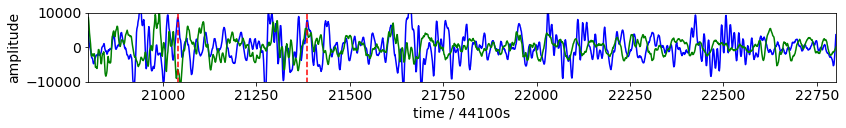

In [10]:
'''sources together in time, three special points, two shown'''
fig = plt.figure(figsize=(12, 2))
plt.plot(s1, 'b-')
plt.plot(s2, 'g-')
plt.axis((20800, 22800, -10000, 10000));
indices = [9778, 21040, 21385]
for i in indices:
    plt.plot(2*[i], [-15000, 15000], 'r--')
    # print(s1[i], s2[i])
plt.xlabel('time / 44100s')
plt.ylabel('amplitude')
plt.tight_layout();

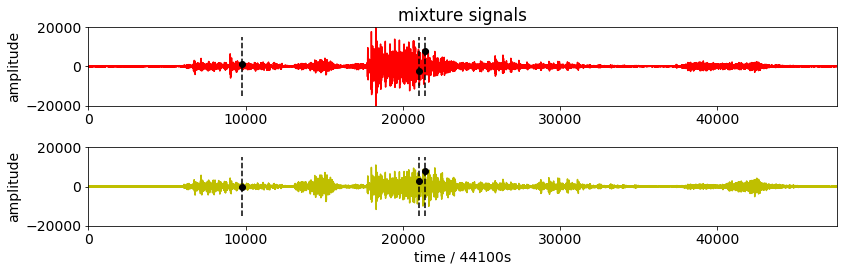

In [11]:
'''two mixtures in time'''
fig = plt.figure(figsize=(12, 4))
fig.add_subplot(2, 1, 1)
plt.plot(x1, 'r-');
plt.title('mixture signals')
for i in indices:
    plt.plot(2*[i], [-15000, 15000], 'k--')
    plt.plot([i], [x1[i]], 'ko')
plt.axis((0, s1.shape[0], -20000, 20000))
plt.ylabel('amplitude')
fig.add_subplot(2, 1, 2)
plt.plot(x2, 'y-');
for i in indices:
    plt.plot(2*[i], [-15000, 15000], 'k--')
    plt.plot([i], [x2[i]], 'ko')
plt.axis((0, s1.shape[0], -20000, 20000))
plt.xlabel('time / 44100s')
plt.ylabel('amplitude')
plt.tight_layout();

- Originalquellen erscheinen unabhängig
- Mischungen nicht

Wir haben aber nur die Mischungen. 

## Wie trennen?

## PCA Hauptkomponenten?

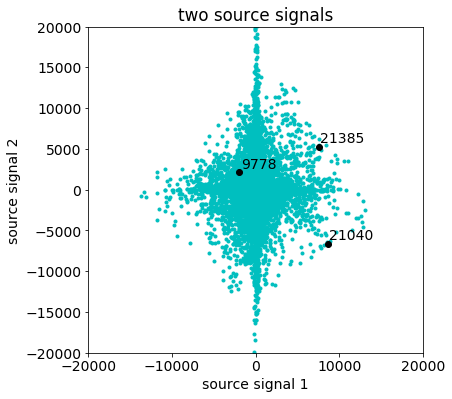

In [12]:
'''two sources s1,s2'''
f = plt.figure(figsize=(6, 6))
plt.plot(s1,s2,'c.')
plt.axis((-20000, 20000, -20000, 20000))
plt.title('two source signals')
plt.xlabel('source signal 1')
plt.ylabel('source signal 2')
for j,i in enumerate(indices):
    plt.plot([s1[i]], [s2[i]], 'ko')
    plt.text(s1[i]+200, s2[i]+500, '{}'.format(i));

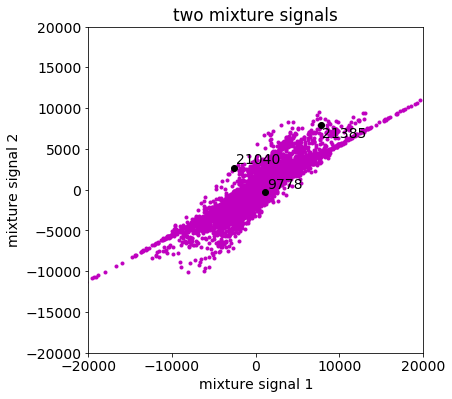

In [13]:
'''two mixtures x1, x2'''
f = plt.figure(figsize=(6, 6))
plt.plot(x1,x2,'m.')
plt.axis((-20000, 20000, -20000, 20000))
plt.title('two mixture signals')
plt.xlabel('mixture signal 1')
plt.ylabel('mixture signal 2')
for j,i in enumerate(indices):
    plt.plot([x1[i]], [x2[i]], 'ko')
    plt.text(x1[i]+200, x2[i]+500-1000*j*(j-1), '{}'.format(i));

# PCA

In [14]:
X = np.array([x1, x2]) # matrix of two mixture vectors
print('dataset has shape {}'.format(X.shape))
C = np.cov(X)
print('covariance matrix has shape {} :'.format(C.shape))
print(np.round(C, decimals=1))

dataset has shape (2, 47628)
covariance matrix has shape (2, 2) :
[[ 2378984.7  1693900.2]
 [ 1693900.2  1566033. ]]


In [15]:
from sklearn.decomposition import PCA
print('data X has shape: {}'.format(X.shape))
pca = PCA()  # initiate new pca
Z = pca.fit_transform(X.T).T # transform data X into pc z1 and z2
print('data in principal components space has shape {}'.format(Z.shape))
print('pca variance explained: {}'
      .format(np.round(pca.explained_variance_ratio_, decimals=4)))

data X has shape: (2, 47628)
data in principal components space has shape (2, 47628)
pca variance explained: [ 0.9416  0.0584]


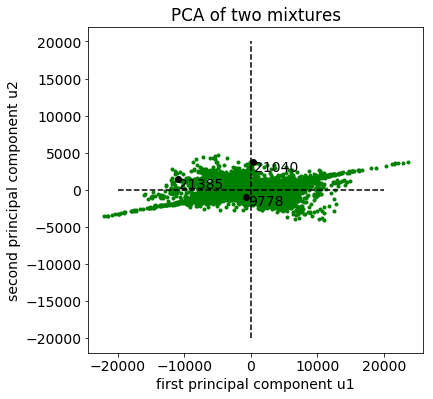

In [16]:
'''Mixtures in principal components space u1, u2'''
fig = plt.figure(figsize=(6, 6))
plt.plot(Z[0], Z[1], 'g.')
plt.xlabel('first principal component u1')
plt.ylabel('second principal component u2')
plt.plot(2*[0], [-20000, 20000], 'k--')
plt.plot([-20000, 20000], 2*[0], 'k--')
plt.title('PCA of two mixtures')
for j,i in enumerate(indices):
    plt.plot([Z[0][i]], [Z[1][i]], 'ko')
    plt.text(Z[0][i]+200, Z[1][i]-1200, '{}'.format(i));


## ??

In [17]:
Audio(0.4*Z[0], rate=freq, autoplay=False)

In [18]:
# verfunffacht, weil Varianz sehr klein ist.
Audio(2*Z[1], rate=freq, autoplay=False)

In [19]:
'''Test, if PCA worked correctly'''
print(np.cov(Z))
# wenn es ein diag Martix ist, ist die Ergebnis gut.

[[  3.71449633e+06   4.17178633e-11]
 [  4.17178633e-11   2.30521355e+05]]


#### Varianz ist maximiert

#### Kovarianzmatrix ist diagonal

#### Durch PCA gefundene Signale sind dekorreliert

Erinnerung: *Whitening*

# Keine Lösung ...

Ursprüngliche Quellsignale nicht gefunden

# Aber Ideen?

# unkorreliert $\neq$ unabhängig

# Fragen?